In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
data = raw_data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [9]:
##Dealing with missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
data_no_mv = data.dropna(axis=0)

In [11]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [12]:
##exploring the pdfs

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\216991009.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

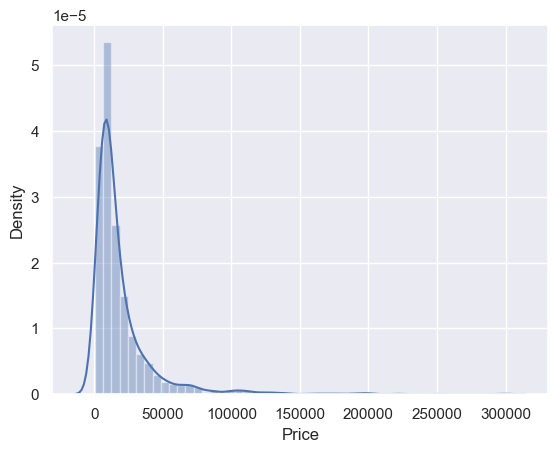

In [14]:
sns.distplot(data_no_mv['Price'])

In [15]:
##Dealing with outliers
#Outliers are observations that lie on abnormal distance from the rest

In [46]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]  
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


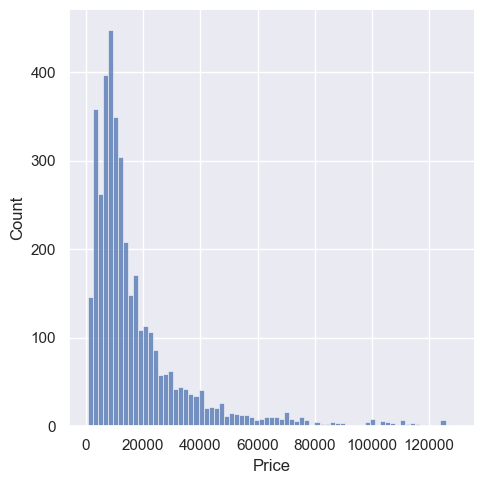

In [48]:
sns.displot(data_1['Price'])

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\534165355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

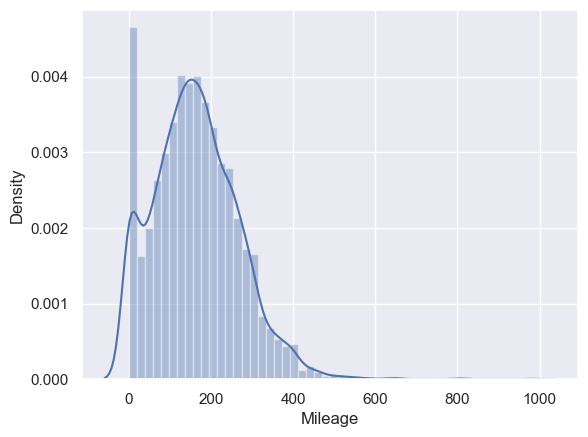

In [53]:
sns.distplot(data_no_mv['Mileage'])

In [54]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

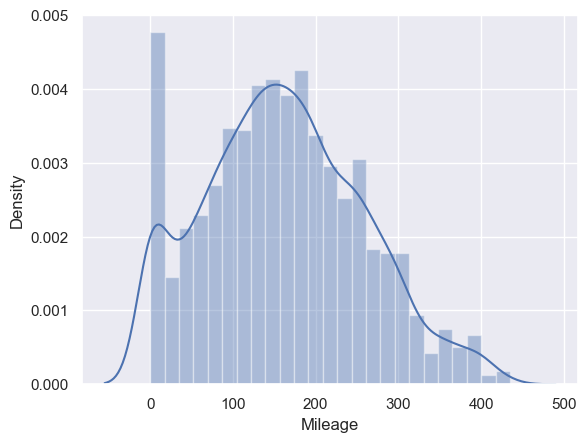

In [55]:
sns.distplot(data_2['Mileage'])

In [56]:
q = data_1['EngineV'].quantile(0.99)
data_2 = data_1[data_1['EngineV']<q]

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\823394628.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

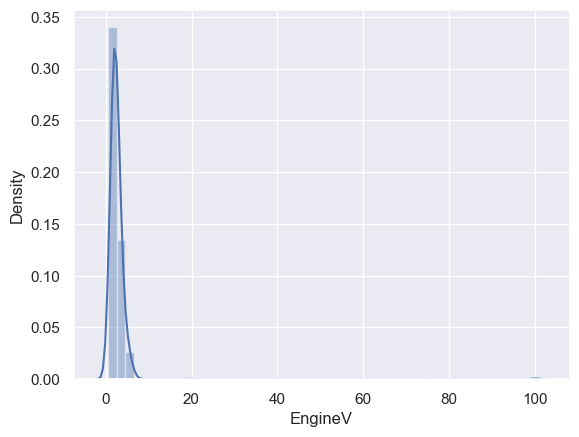

In [57]:
sns.distplot(data_no_mv['EngineV'])

In [58]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\1902427236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

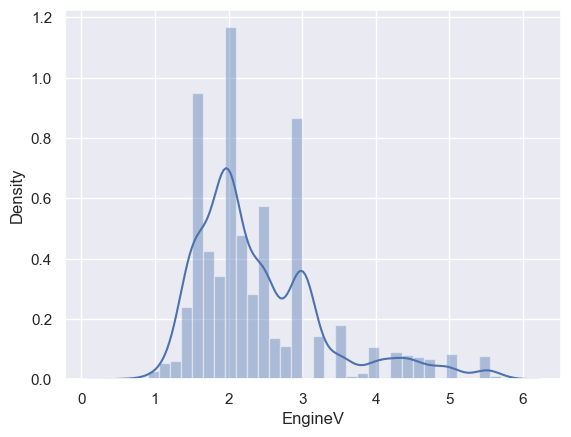

In [59]:
sns.distplot(data_3['EngineV'])

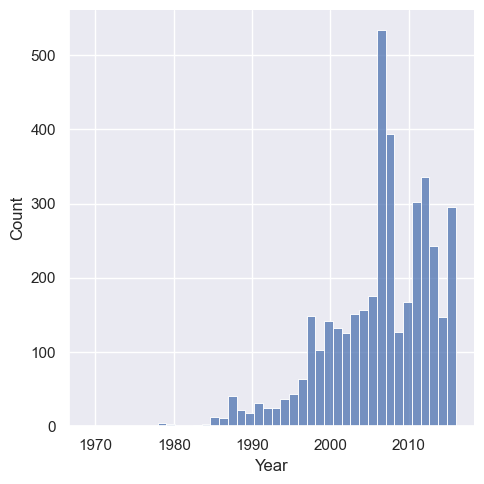

In [37]:
sns.displot(data_no_mv['Year'])

In [60]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [61]:
data_cleaned = data_4.reset_index(drop=True)

In [62]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3878,3878.000000,3878,3878.000000,3878.000000,3878,3878,3878.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1466,NaN,NaN,1834,3513,NaN
mean,NaN,17935.781359,NaN,164.446622,2.423917,NaN,NaN,2006.612945
std,NaN,18934.196915,NaN,102.512963,0.898637,NaN,NaN,6.187468
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21150.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


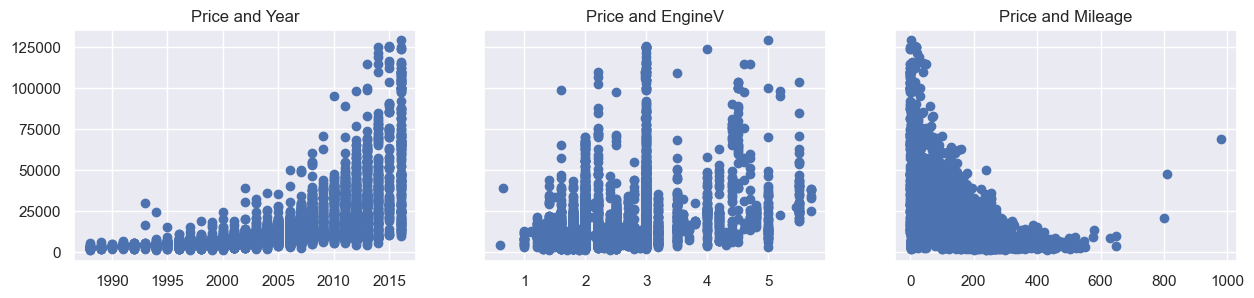

In [63]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_17260\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])


<Axes: xlabel='Price', ylabel='Density'>

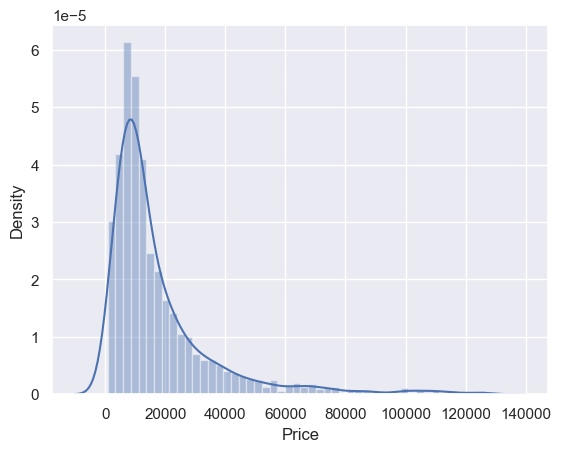

In [64]:
sns.distplot(data_cleaned['Price'])

In [66]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3873,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3874,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3875,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3876,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


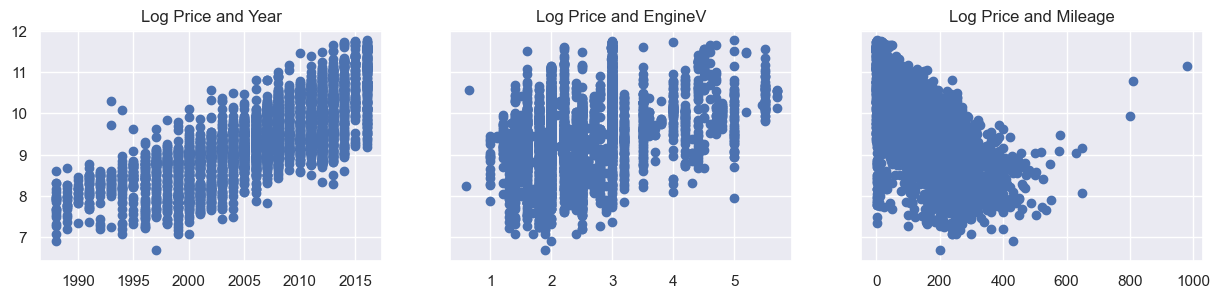

In [68]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [69]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [70]:
##Multicolinerality


In [72]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [77]:
vif

,VIF,features
0,3.551632,Mileage
1,10.613414,Year
2,8.278981,EngineV


In [78]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

In [79]:
##Create Dummy Variables

In [80]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [81]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [82]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [83]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [84]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [86]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [88]:
input_scaled = scaler.transform(inputs)

In [89]:
###Train Test Split

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=365)

In [92]:
###Create the regression

In [93]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [94]:
y_hat = reg.predict(x_train)

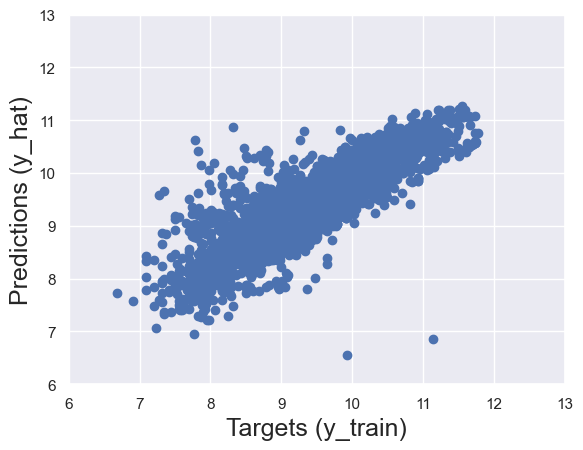

In [97]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

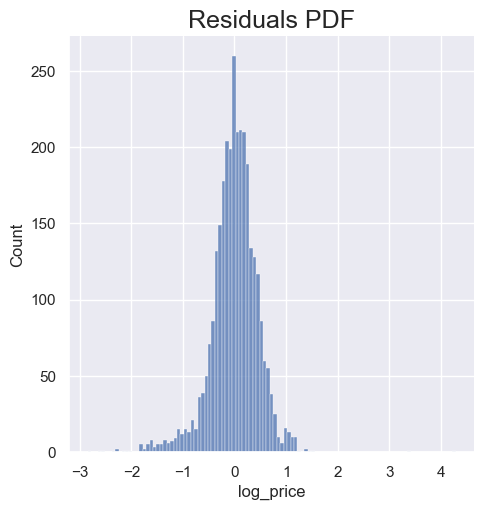

In [98]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [99]:
reg.score(x_train, y_train)

0.7212322087671399

In [100]:
##Finding the weights and bias

In [101]:
reg.intercept_

9.398768714378711

In [102]:
reg.coef_

array([-0.44245916,  0.20374441,  0.01383345,  0.01833104, -0.13361451,
       -0.17807568, -0.05682419, -0.0829643 , -0.14777832, -0.11170623,
       -0.21281181, -0.13629021, -0.18138165, -0.13293938, -0.02901227,
       -0.15086497,  0.32829228])

In [103]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.442459
1,EngineV,0.203744
2,Brand_BMW,0.013833
3,Brand_Mercedes-Benz,0.018331
4,Brand_Mitsubishi,-0.133615
5,Brand_Renault,-0.178076
6,Brand_Toyota,-0.056824
7,Brand_Volkswagen,-0.082964
8,Body_hatch,-0.147778
9,Body_other,-0.111706


In [104]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [105]:
###Testing

In [106]:
y_hat_test = reg.predict(x_test)

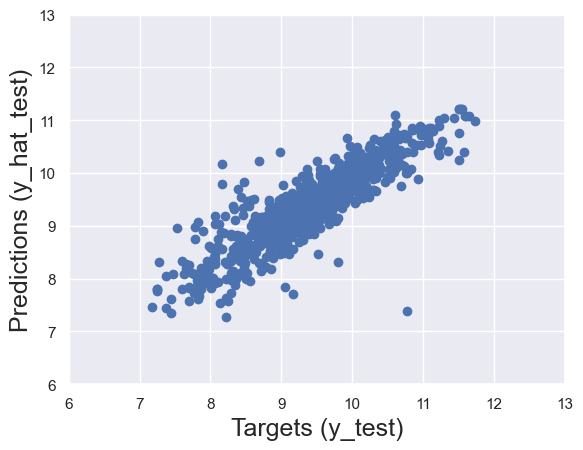

In [107]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [109]:
df_pf = pd.DataFrame(np.exp(y_hat), columns = ['Prediction'])
df_pf.head()

,Prediction
0,19984.924003
1,22675.598924
2,42525.576616
3,8693.972740
4,10402.125738


In [111]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,19984.924003,NaN
1,22675.598924,7900.0
2,42525.576616,NaN
3,8693.972740,NaN
4,10402.125738,NaN
...,...,...
3097,22525.435299,NaN
3098,29572.547528,NaN
3099,8069.381495,NaN
3100,9244.243334,NaN


In [114]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    11.512915
1     9.680344
2     8.665613
3     9.137770
4     8.895630
Name: log_price, dtype: float64

In [115]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,19984.924003,99999.0
1,22675.598924,16000.0
2,42525.576616,5800.0
3,8693.972740,9300.0
4,10402.125738,7300.0
...,...,...
3097,22525.435299,NaN
3098,29572.547528,NaN
3099,8069.381495,NaN
3100,9244.243334,NaN


In [116]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [120]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,19984.924003,99999.0,80014.075997,80.014876
1,22675.598924,16000.0,-6675.598924,41.722493
2,42525.576616,5800.0,-36725.576616,633.199597
3,8693.972740,9300.0,606.027260,6.516422
4,10402.125738,7300.0,-3102.125738,42.494873
...,...,...,...,...
3097,22525.435299,NaN,NaN,NaN
3098,29572.547528,NaN,NaN,NaN
3099,8069.381495,NaN,NaN,NaN
3100,9244.243334,NaN,NaN,NaN


In [121]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,3102.000000,776.000000,776.000000,776.000000
mean,15939.102039,17255.709072,959.207445,150.313916
std,12539.861491,17961.297363,22510.484747,258.080722
min,704.857419,1300.000000,-70496.551005,0.081307
25%,7774.580001,6900.000000,-8874.428029,34.010855
50%,11994.651060,10999.000000,-317.760355,65.933853
75%,19875.941526,20924.750000,8612.636968,122.870212
max,77946.551005,124000.000000,110781.726982,2618.226450


In [125]:
pd.options.display.max_rows = 999
pd.set_option('display.float.format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
534,6194.96,6200.00,5.04,0.08
155,47041.00,47000.00,-41.00,0.09
550,12436.66,12400.00,-36.66,0.30
440,16072.58,16000.00,-72.58,0.45
692,7542.53,7600.00,57.47,0.76
...,...,...,...,...
3097,22525.44,NaN,NaN,NaN
3098,29572.55,NaN,NaN,NaN
3099,8069.38,NaN,NaN,NaN
3100,9244.24,NaN,NaN,NaN
